# Making slice plots (Beginner)

### Import packages

In [1]:
import numpy                          as np
import matplotlib.pyplot              as plt

# import plons scripts
import plons.LoadData                 as load
import plons.SmoothingKernelScript    as sk
import plons.ConversionFactors_cgs    as cgs
import plons.Plotting                 as plot

### Setting information about data

In [2]:
prefix = "wind"
loc = "/STER/matse/Papers/Esseldeurs+2023/Phantom/High/binary6Lucy/"
phantom_dir = "/home/matse/codes/phantom/"
dump = loc+"wind_00600"

### Loading setup and dump

In [3]:
setup     = load.LoadSetup(loc, prefix)

In [4]:
dumpData  = load.LoadDump_cgs(dump, setup, phantom_dir)

### Plotting density in the orbital plane

#### Plotting around the CoM

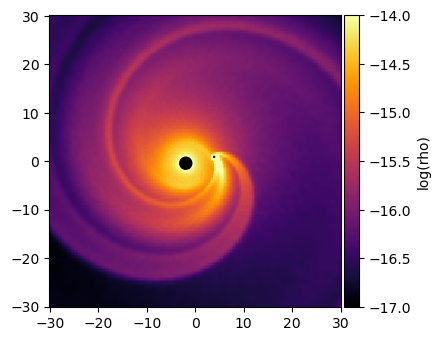

In [5]:
fig, ax = plt.subplots(1, figsize=(4, 4))
ax, cbar = plot.SlicePlot2D(ax, dumpData, setup, xlim=(-30, 30), ylim=(-30, 30))

#### Plotting around the companion

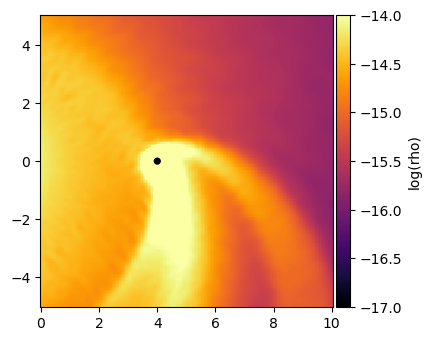

In [6]:
fig, ax = plt.subplots(1, figsize=(4, 4))
ax, cbar = plot.SlicePlot2D(ax, dumpData, setup, xlim=(0, 10), ylim=(-5, 5), rotate=True)

### Making your own plane on which to smooth (as a meshgrid)

In [7]:
n = 200
x = np.linspace(-30, 30, n)*cgs.au
y = np.linspace(-30, 30, n)*cgs.au
X, Y = np.meshgrid(x, y)
Z    = np.zeros_like(X)

#### Smoothing the data on the plane

In [8]:
smooth = sk.smoothMesh(X, Y, Z, dumpData, ['rho'])

#### Plotting the plane

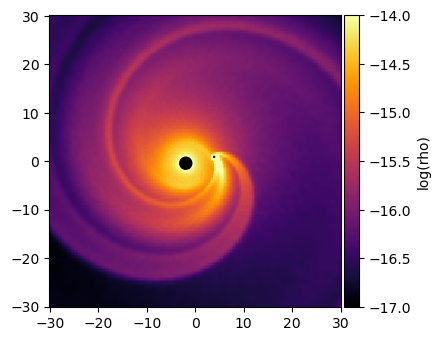

In [9]:
fig, ax = plt.subplots(1, figsize=(4, 4))
plot.plotSlice(ax, X, Y, smooth, 'rho', logplot=True, cmap = plt.cm.get_cmap('inferno'), clim=(-17, -14))
plot.plotSink(ax, dumpData, setup)